# Demo Main

Demoing the main methods for the AI CPAK Paper

@author Jack Bosco

In [ ]:
import os
os.chdir("../ai_cpak")

## Treat the dataset for information processing and feature selection

In [2]:
print("Treating Data")
import treat_data

Treating Data
Shape: (530, 16)


## visualize the dataset

Making standard visualizations


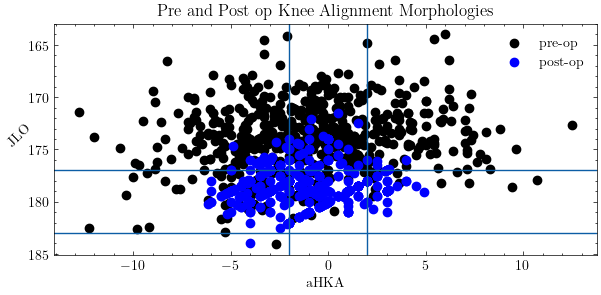

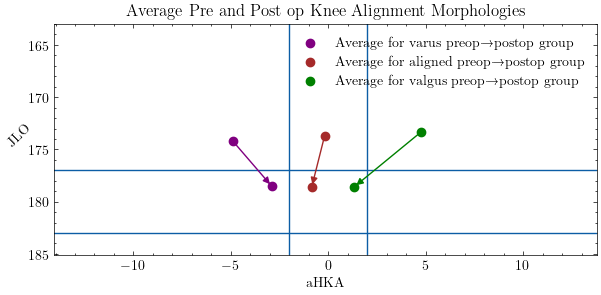

In [3]:
print("Making standard visualizations")
import data_viz

## Load the normalizer weights

In [4]:
print("Loading normalizers", end=' ')
import regression

Loading normalizers 

## Present MLP regression chart

and presenting MLP:
activation           : tanh                alpha                : 0.0001              batch_size           : 4                   
beta_1               : 0.9                 beta_2               : 0.999               early_stopping       : False               
epsilon              : 1e-08               hidden_layer_sizes   : (16, 8, 4)          learning_rate        : adaptive            
learning_rate_init   : 0.001               max_fun              : 15000               max_iter             : 2000                
momentum             : 0.9                 n_iter_no_change     : 10                  nesterovs_momentum   : True                
power_t              : 0.5                 random_state         : 42                  shuffle              : True                
solver               : sgd                 tol                  : 0.0001              validation_fraction  : 0.05                


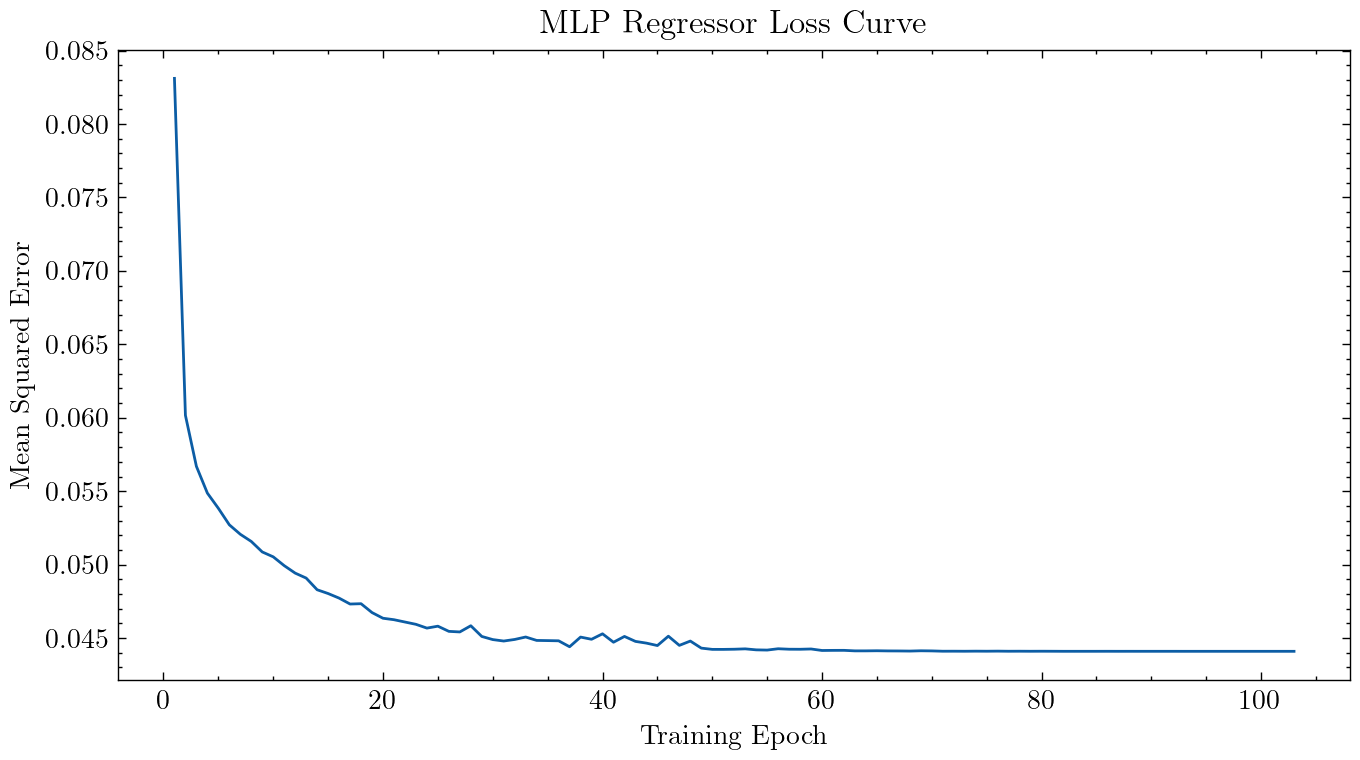

Mean Squared Error for neural network: 2.124284801621039
Mean Squared Error for neural network on training data: 2.052579501278152
R2 Score: 0.4441752809949173
Root Mean Squared Error for dataset: 1.4401705077458773
Nash Sutcliffe Score: 0.5790708367141765


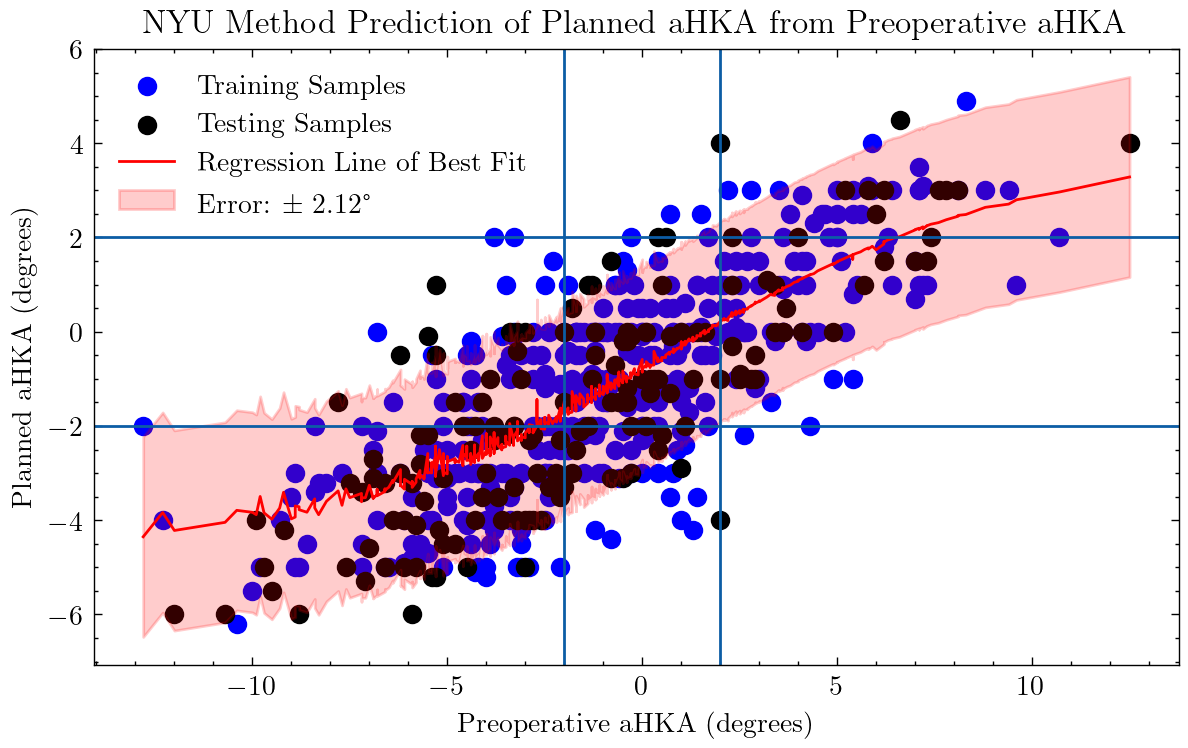

In [5]:
print("and presenting MLP:")
regression.do_mlp(train=True)

# Why Does The Model Look Overfit?

The regression above is misleading.
Since the model accepts $<MPTA, LDFA>$ pairs as input and returns $<MPTA, LDFA>$ pairs as output,
it is difficult to visualize in a 2D regression plot.
Instead we use aHKA, which is equal to $MPTA - LDFA$, as the axis for the plot.
Thus the appearent overfitting is actually the result of 2D space being flattened into a 1D axis.

In [6]:
import pickle

import config
model=pickle.load(open(config.model_path, 'rb'))

import numpy as np
tot_params = 0
for layer in model.coefs_:
    print("Layer: (input {0} | output {1})".format(*layer.shape))
    tot_params += np.prod(layer.shape)

print("Total parameters:",tot_params)

Layer: (input 2 | output 16)
Layer: (input 16 | output 8)
Layer: (input 8 | output 4)
Layer: (input 4 | output 2)
Total parameters: 200
